# New York City Citywide Mobility Survey 2019
# Regression Analysis

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

### 1. Importing libraries and data

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [100]:
# This option ensures that the graphs I create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [101]:
# Define path
path = r'/Users/peimei/11-2023 New York City Citywide Mobility Survey 2019'

# Join the path using 'os.path.join'
file_path = os.path.join(path, '02 Data', 'Prepared Data', 'Citywide_Mobility_Survey_Trips_Person_Vehicle.csv')

# Read the CSV file into a DataFrame
trips_person_vehicle = pd.read_csv(file_path,index_col = [0],low_memory=False)

In [102]:
# Display the first few rows of the DataFrame
trips_person_vehicle.head()

,hh_id,trip_weight,home_cms_zone,survey_mode,person_id,day_num,travel_date,travel_date_dow,trip_id,trip_num,...,d_purpose_category_imputed,o_location_type_imputed,d_location_type_imputed,o_congestion,d_congestion,age,jobs_count,industry,distance_category,vehicle_num
0,19000235,0.0,Northern Bronx,smartphone app,1900023501,1,2019-05-30,Thursday,1900023501001,1,...,Work,4,2,1,0,35-44,1,Financial services,>3 miles,2.0
1,19000235,0.0,Northern Bronx,smartphone app,1900023501,3,2019-06-01,Saturday,1900023501004,4,...,Home,2,1,0,0,35-44,1,Financial services,>3 miles,2.0
2,19000235,0.0,Northern Bronx,smartphone app,1900023501,4,2019-06-02,Sunday,1900023501013,13,...,Meal,4,4,0,0,35-44,1,Financial services,>3 miles,2.0
3,19000235,0.0,Northern Bronx,smartphone app,1900023501,4,2019-06-02,Sunday,1900023501014,14,...,Meal,4,4,0,0,35-44,1,Financial services,>3 miles,2.0
4,19000235,0.0,Northern Bronx,smartphone app,1900023501,5,2019-06-03,Monday,1900023501016,16,...,Meal,4,4,0,0,35-44,1,Financial services,1-3 miles,2.0


In [103]:
trips_person_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74923 entries, 0 to 74922
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hh_id                       74923 non-null  int64  
 1   trip_weight                 74923 non-null  float64
 2   home_cms_zone               74923 non-null  object 
 3   survey_mode                 74923 non-null  object 
 4   person_id                   74923 non-null  int64  
 5   day_num                     74923 non-null  int64  
 6   travel_date                 74923 non-null  object 
 7   travel_date_dow             74923 non-null  object 
 8   trip_id                     74923 non-null  int64  
 9   trip_num                    74923 non-null  int64  
 10  leg_num                     74923 non-null  int64  
 11  depart_date                 74923 non-null  object 
 12  arrive_date                 74923 non-null  object 
 13  o_cms_zone                  696

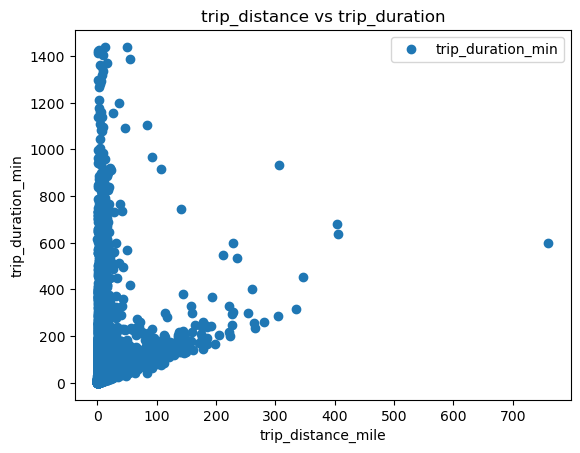

In [104]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

trips_person_vehicle.plot(x = 'trip_distance_mile', y='trip_duration_min',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('trip_distance vs trip_duration')  
plt.xlabel('trip_distance_mile')  
plt.ylabel('trip_duration_min')  
plt.show()

### My hypothesis: The longer the trip distance is, the longer the trip lasts in time.

### 2. Data cleaning

Already done in the previous exercise.

### 3. Data prep for regression analysis

In [105]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = trips_person_vehicle['trip_distance_mile'].values.reshape(-1,1)
y = trips_person_vehicle['trip_duration_min'].values.reshape(-1,1)

In [106]:
X

array([[13.4],
       [ 3.7],
       [ 9.8],
       ...,
       [ 0.8],
       [ 1.1],
       [ 0.2]])

In [107]:
y

array([[11.1],
       [ 9.1],
       [17.9],
       ...,
       [13.4],
       [27.3],
       [ 2.2]])

In [108]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [109]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [110]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [111]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

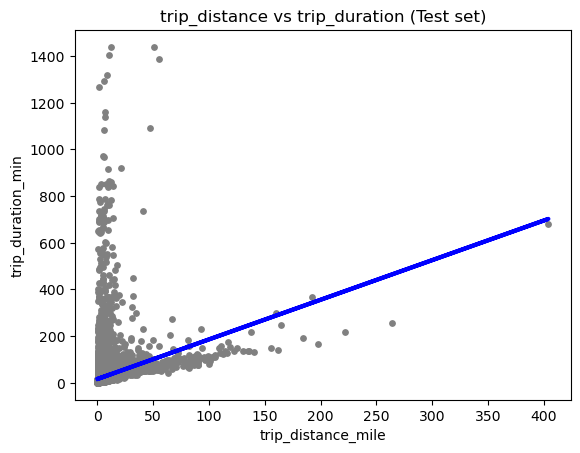

In [112]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='blue', linewidth =3)
plot_test.title('trip_distance vs trip_duration (Test set)')
plot_test.xlabel('trip_distance_mile')
plot_test.ylabel('trip_duration_min')

# Export viz
plot_test.savefig(os.path.join(path, '04 Analysis','Visualizations', 'regression_test.png'))

### Task: Write your own interpretation of how well the line appears to fit the data in a markdown cell.

### Answer: 
A large amount of the data points are far off the regression line, especially the trips that take longer time or stretch longer in distance. So this doesn't seem to be a fitting prediction model. What's more, the data set doesn't contain many long-distance trips. This could be further contributing to the inaccuracy of the model.

In [113]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

### Check the model performance statistics—MSE and R2 score.

In [114]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.69735762]]
Mean squared error:  2737.7102838105175
R2 score:  0.08922481043501418


In [115]:
y_predicted

array([[34.00253571],
       [17.19869529],
       [19.4052602 ],
       ...,
       [21.6118251 ],
       [17.02895953],
       [17.02895953]])

In [116]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,36.9,34.002536
1,9.0,17.198695
2,9.8,19.405260
3,6.0,25.176276
4,3.0,16.689488
5,17.8,21.781561
6,5.2,16.859224
7,38.3,26.534162
8,34.8,25.346012
9,8.9,17.368431


### Task: Include your thoughts on how well the model performed on the test set in a markdown cell. Include any reflections you have on the impact of possible data bias.

* The MSE is at around 2738, which indicates that the regression line isn’t an accurate representation of the data and can’t accurately predict the influence of trip distance on the trip duration.

* The R2 score is around 0.09, which is low. This tells us that the model doesn't explain the variance in the data well. It is a poor fit.

* I see there’s quite the difference between the actual and predicted y values. So it's safe to say that the model isn’t doing a great job of explaining the relationship between the “trip distance” and “trip duration” variables.

* The relationship doesn’t follow a single, straight regression line. I can also rule out my hypothesis, “The longer the trip distance is, the longer the trip lasts in time.” To accurately represent the data, we need to form new hypotheses to find the best fitting model. 